__Customer Personality Analysis__

El análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y le facilita la modificación de los productos en función de las necesidades, comportamientos y preocupaciones específicas de los distintos tipos de clientes.

Por ejemplo, en lugar de gastar dinero en comercializar un nuevo producto a todos los clientes de la base de datos de la empresa, ésta puede analizar qué segmento de clientes tiene más probabilidades de comprar el producto y comercializarlo sólo en ese segmento concreto.

__Variables__ 

__People__
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

__Products__
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

__Promotion__
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

__Place__
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month


__1.) Importar Librerias__

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

__2.) Importar Dataset__

In [3]:
df = pd.read_csv('/Users/erickfernandochaconflores/Downloads/marketing_campaign 2.csv')
df.set_index('ID', inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


__3.) Preprocesamiento de datos__

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   int

In [5]:
# Convertir variables tipo texto a categoricas

df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   category
 2   Marital_Status       2240 non-null   category
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   int64   
 5   Teenhome             2240 non-null   int64   
 6   Recency              2240 non-null   int64   
 7   MntWines             2240 non-null   int64   
 8   MntFruits            2240 non-null   int64   
 9   MntMeatProducts      2240 non-null   int64   
 10  MntFishProducts      2240 non-null   int64   
 11  MntSweetProducts     2240 non-null   int64   
 12  MntGoldProds         2240 non-null   int64   
 13  NumDealsPurchases    2240 non-null   int64   
 14  NumWebPurchases      2240 non-null   int64   
 15  NumCatalogPurchases  22

In [7]:
conteo_valores = df['Education'].value_counts()
print(conteo_valores)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [8]:
conteo_valores2 = df['Marital_Status'].value_counts()
print(conteo_valores2)

#Viuda #Sola #Absurdo #YOLO

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [9]:
# Convertir Variables Categoricas a Númericas
label_encoder = LabelEncoder ()

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   int64  
 2   Marital_Status       2240 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   int

In [10]:
conteo = df['Education'].value_counts()
print(conteo)

#Education:
#____________________
#Graduation    1127
#PhD            486
#Master         370
#2n Cycle       203
#Basic           54

Education
2    1127
4     486
3     370
0     203
1      54
Name: count, dtype: int64


In [11]:
conteo2 = df['Marital_Status'].value_counts()
print(conteo2)

#Marital_Status
#____________________
#Married     864
#Together    580
#Single      480
#Divorced    232
#Widow        77
#Alone         3
#Absurd        2
#YOLO          2

Marital_Status
3    864
5    580
4    480
2    232
6     77
1      3
0      2
7      2
Name: count, dtype: int64


In [12]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
2174,1954,2,4,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
4141,1965,2,5,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
6182,1984,2,5,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
5324,1981,4,3,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [13]:
# Contar los valores nulos por columna
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [14]:
# Eliminar todas las filas que contienen al menos un valor nulo
df = df.dropna()

In [15]:
# Contar los valores nulos por columna
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

__4.) Análisis de Datos__

<function matplotlib.pyplot.show(close=None, block=None)>

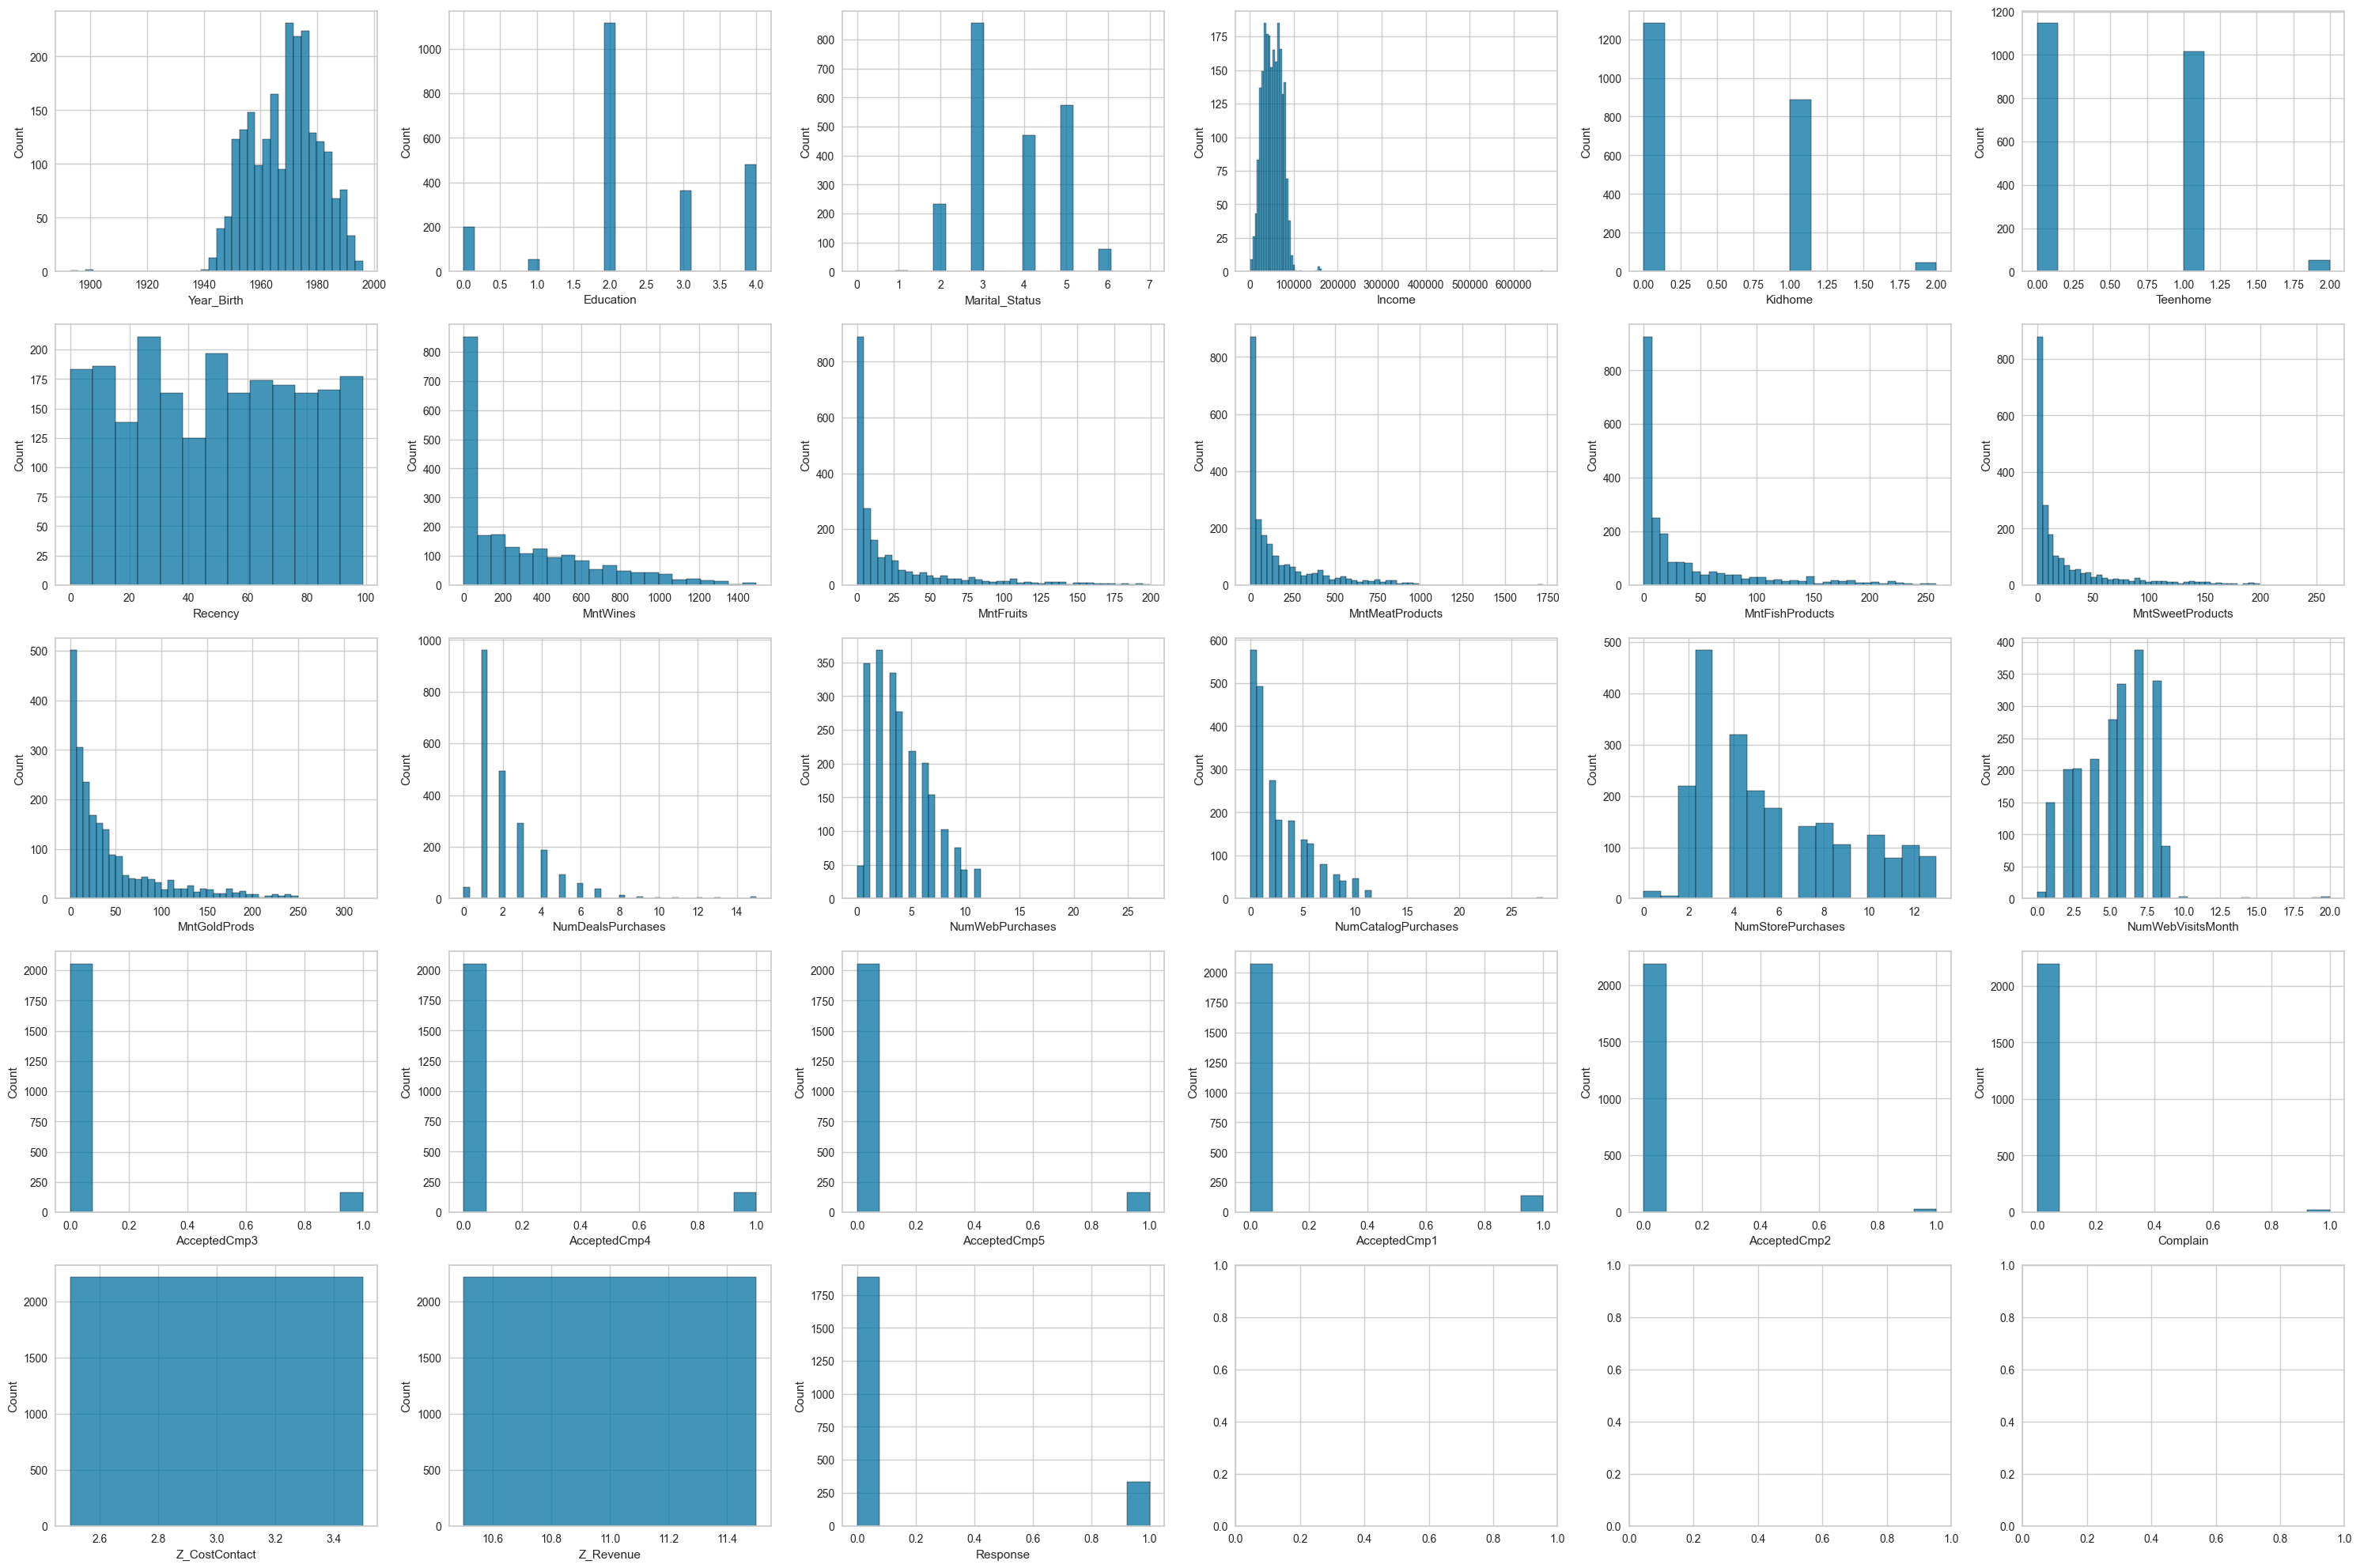

In [18]:
# Histogramas

num_vars = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts',
            'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
            'NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
            'Complain','Z_CostContact','Z_Revenue','Response']


fig, axs = plt.subplots (nrows=5, ncols=6, figsize= (30, 20))
axs = axs.flatten ()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs [i])

fig.tight_layout ()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

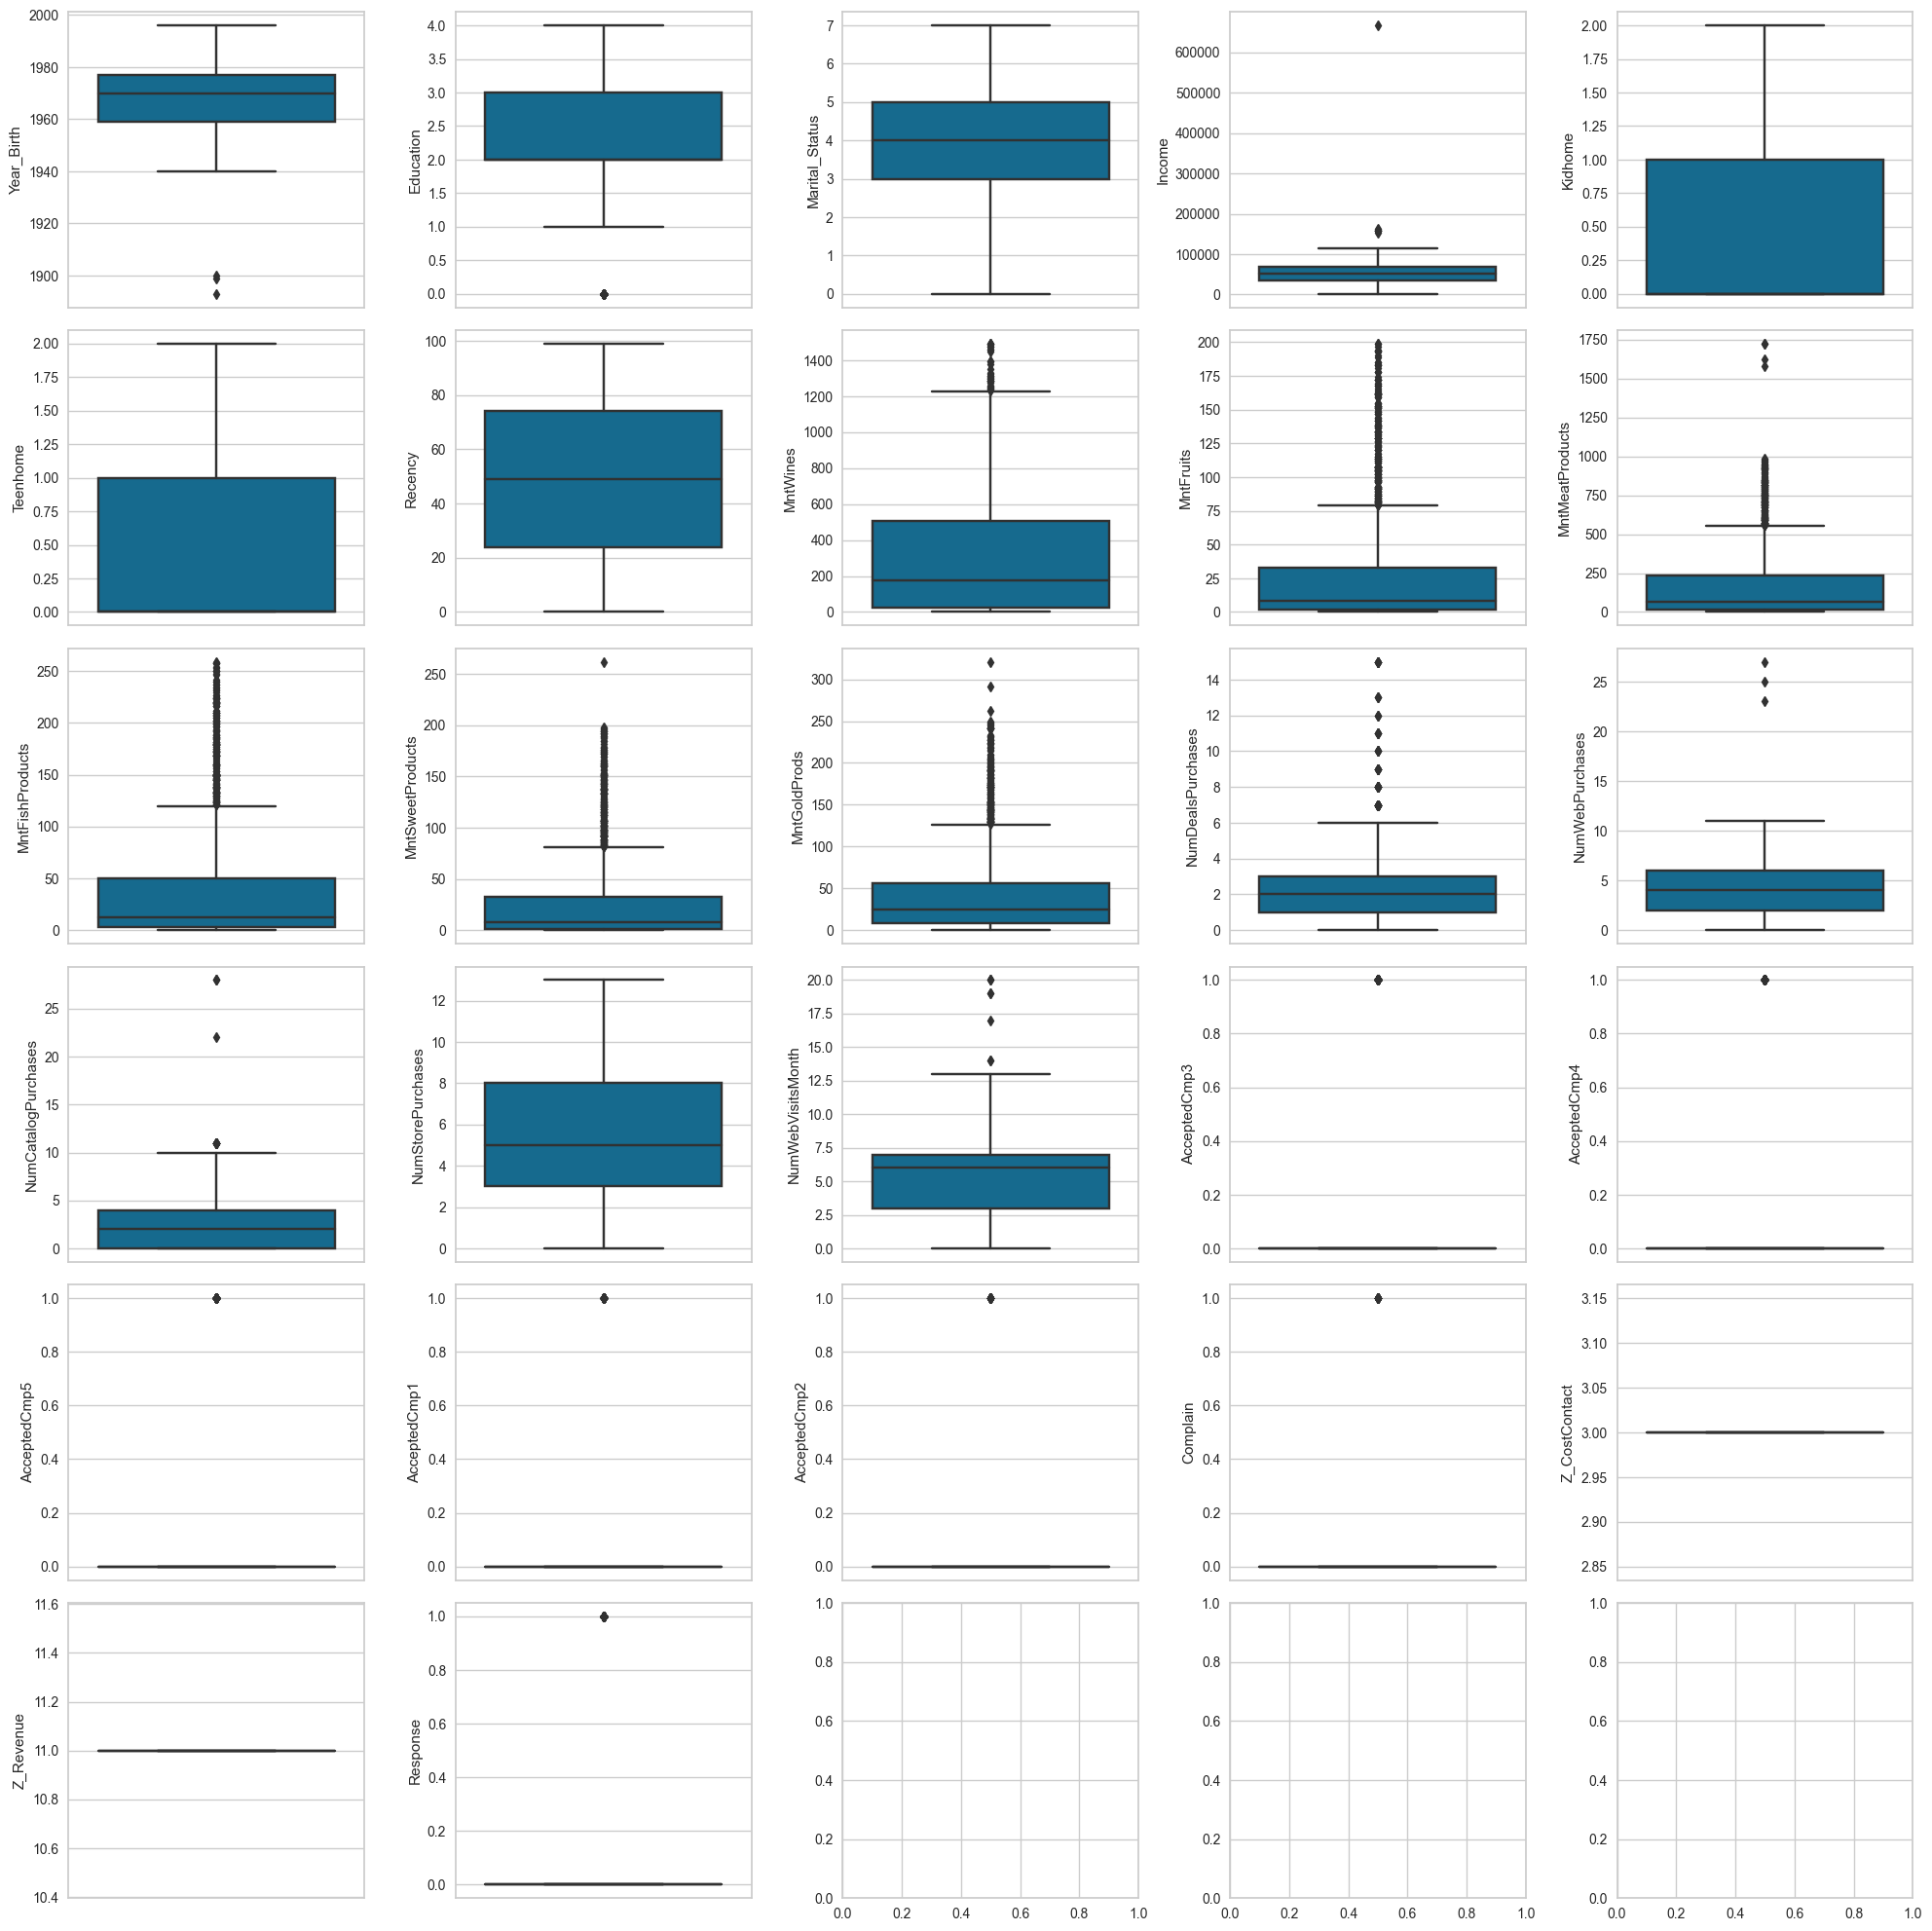

In [19]:
# Boxplots

num_vars = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts',
            'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
            'NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
            'Complain','Z_CostContact','Z_Revenue','Response']

fig, axs = plt.subplots (nrows=6, ncols=5, figsize= (20, 20))
axs = axs.flatten ()

for i, var in enumerate(num_vars):
    sns.boxplot (y=var, data=df, ax=axs [i])

fig.tight_layout ()

plt.show

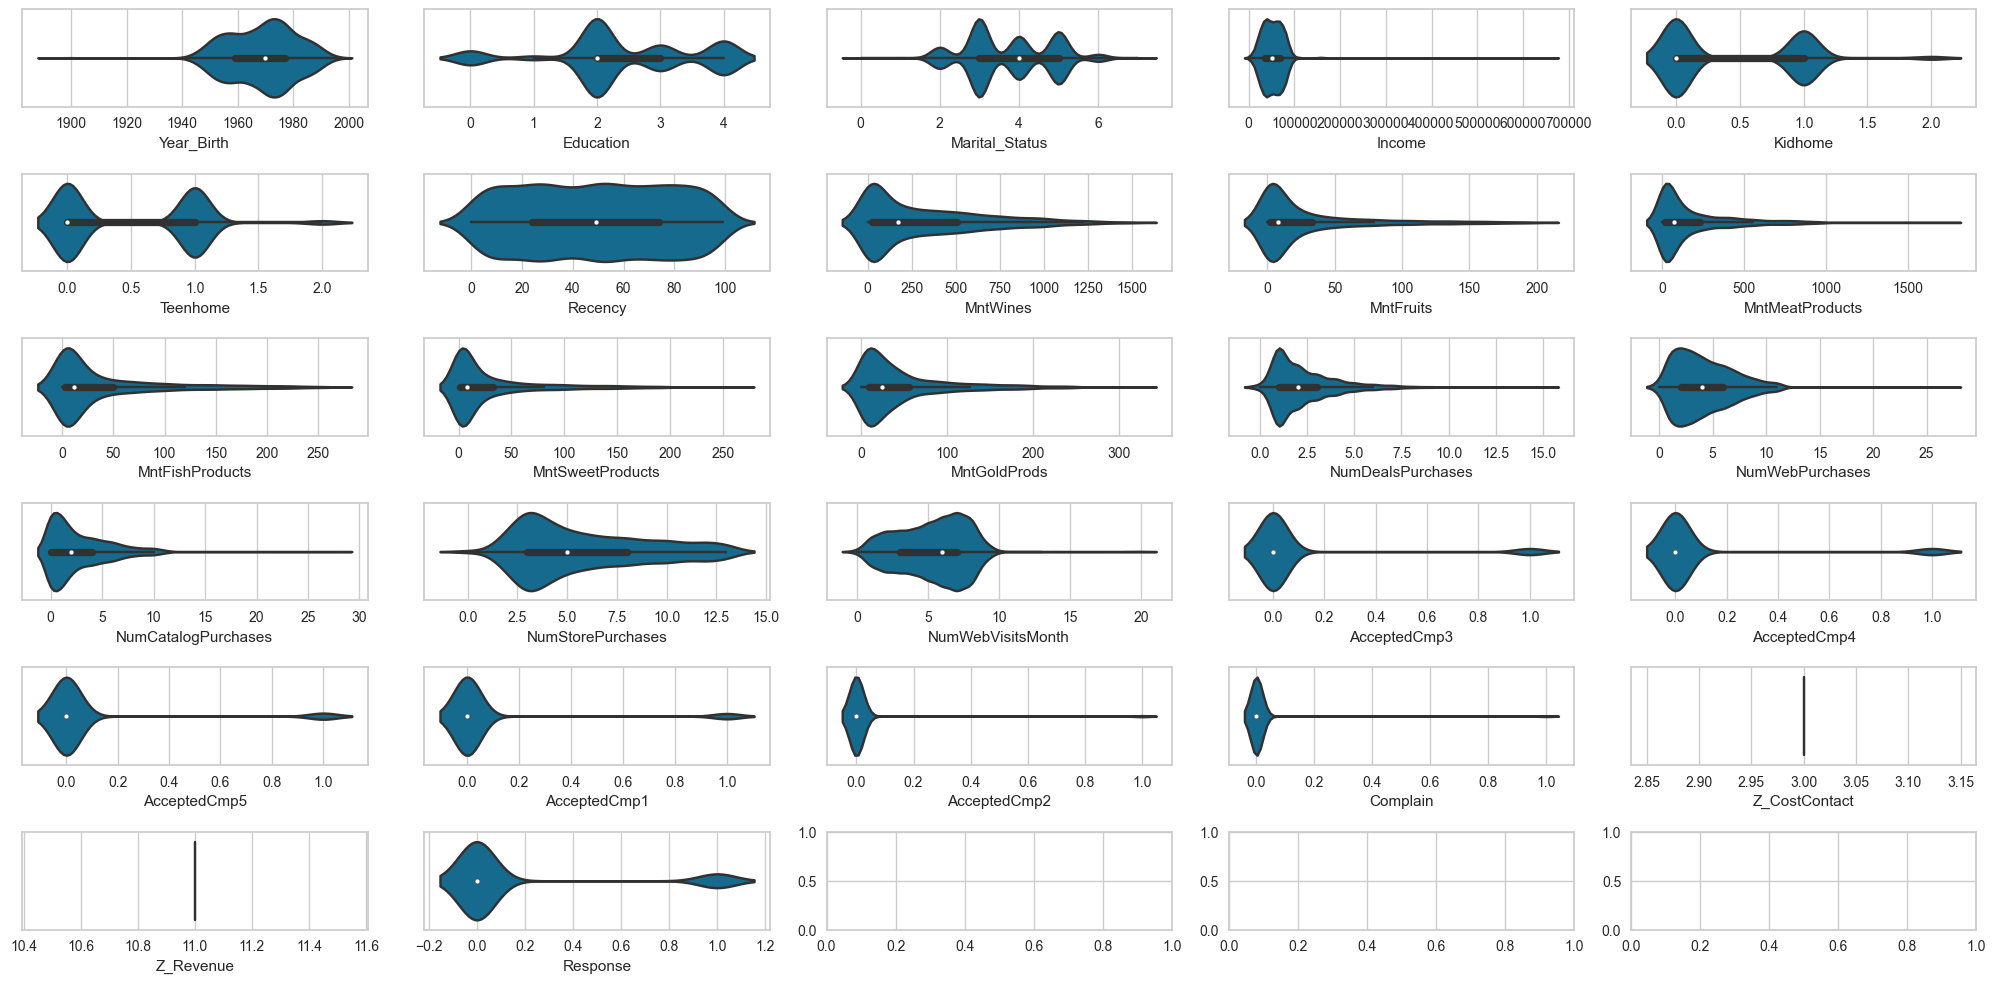

In [20]:
# Gráfico de Violin

num_vars = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts',
            'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
            'NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
            'Complain','Z_CostContact','Z_Revenue','Response']

fig, axs = plt.subplots (nrows=6, ncols=5, figsize= (20, 10))

axs = axs.flatten()

for i, var in enumerate (num_vars) :
    sns.violinplot (x=var, data=df, ax=axs [i])

fig.tight_layout()
plt.show()

__5.) Clustering__

/Users/erickfernandochaconflores/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/erickfernandochaconflores/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/erickfernandochaconflores/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/erickfernandochaconflores/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

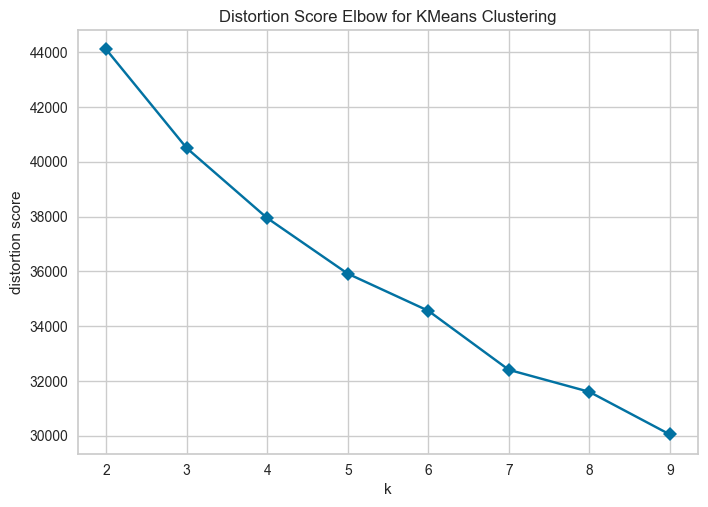

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
scaler = StandardScaler()

# Ajusta el escalador a tus datos y transforma los datos
df_norm = scaler.fit_transform(df)

# Los datos normalizados estan df_norm y ahora se deseaa encontrar el número óptimo de clústeres (k).
# Ahora se creará un modelo K-Means para ajustar los datos.
kmeans = KMeans()

# Utilizar la visualización de codo (KElbowVisualizer) para determinar el número óptimo de clústeres.
visualizer = KElbowVisualizer(kmeans, k=(2, 10), timings=False)

# Ajustar el visualizador a tus datos normalizados.
visualizer.fit(df_norm)

# Visualizar el gráfico de codo.
visualizer.show()

# Busca el punto donde la inercia comienza a disminuir de manera más lenta

In [24]:
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) # Esta linea es clave para no tener problemas con la normalización
df_norm.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,...,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952
1,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,...,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
2,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,...,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
3,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,...,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
4,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,...,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530


In [25]:
# Asignar a cada observación a su cluster correspondiente

# Supongamos que tienes tus datos normalizados en df_norm.
# Crea un modelo K-Means con el número óptimo de clústeres (en este caso, 5).
n_clusters = 5
kmeans = KMeans(n_clusters)  # Cambia el número de clústeres según tu resultado

# Ajusta el modelo K-Means a tus datos normalizados.
kmeans.fit(df_norm)

# Obtiene las etiquetas de clúster para cada observación.
cluster_labels = kmeans.labels_

# Las etiquetas de clúster se encuentran en cluster_labels.
# Puedes asignar estas etiquetas a tu DataFrame original si lo deseas.
# Ejemplo: 

df_norm['Cluster'] = cluster_labels
df_norm.head()

/Users/erickfernandochaconflores/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,1
1,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,2
2,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1
3,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,2
4,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,3


In [26]:
# Utiliza la función melt para convertir las columnas 'balance' a 'tenencia' en tres columnas.
Tres_columnas = pd.melt(df_norm, id_vars=['Cluster'], value_vars=['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts',
            'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
            'NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
            'Complain','Z_CostContact','Z_Revenue','Response'], var_name='Atributo', value_name='Valor')

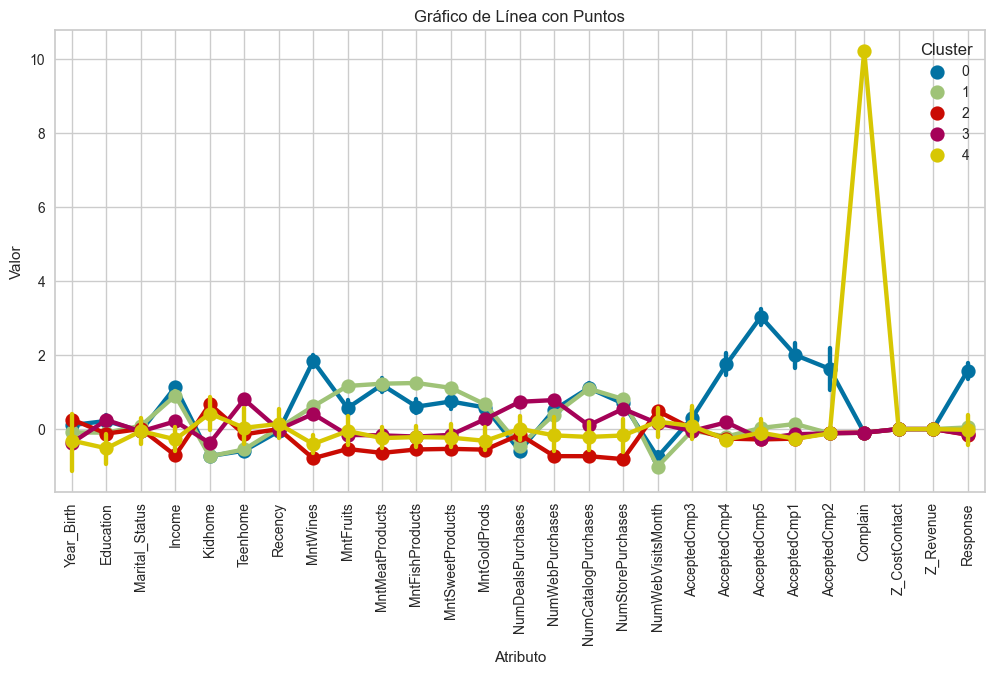

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame 'Tres_columnas' con las columnas 'Atributo', 'Valor' y 'Cluster'.

# Crea un gráfico de línea con puntos y rangos de error para las medias de 'Valor' por 'Atributo' y 'Cluster'.
plt.figure(figsize=(12, 6))
sns.pointplot(data=Tres_columnas, x='Atributo', y='Valor', hue='Cluster')
plt.xticks(rotation=90) #Etiquetas en vertical
plt.xlabel('Atributo')
plt.ylabel('Valor')
plt.title('Gráfico de Línea con Puntos')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()